<a href="https://colab.research.google.com/github/deburg0/chaotic_systems_lstm/blob/main/Generate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


In [2]:
def lorenz(t, X, σ=10, ρ=28, β=8/3):
    """Defines the Lorenz system differential equations."""
    x, y, z = X
    dxdt = σ * (y - x)
    dydt = x * (ρ - z) - y
    dzdt = x * y - β * z
    return [dxdt, dydt, dzdt]


In [3]:
def generate_lorenz_data(t_span=(0, 50), t_eval_step=0.01, init_state=[1, 1, 1]):
    """Generates Lorenz system data and returns time values and corresponding x, y, z states."""
    print("📌 Generating Lorenz system data...")
    t_attr = (0,10)
    att = solve_ivp(lorenz, t_attr, init_state)
    t_eval = np.arange(t_span[0], t_span[1], t_eval_step)
    sol = solve_ivp(lorenz, t_span, att.y[:,-1], t_eval=t_eval)
    print("✅ Data generation complete.")
    return sol.t, sol.y.T


In [4]:
def save_data_to_csv(data, filename="data/lorenz_data.csv"):
    """Saves Lorenz data to CSV file."""
    os.makedirs("data", exist_ok=True)
    print(f"📌 Saving Lorenz data to '{filename}'...")
    pd.DataFrame(data, columns=["x", "y", "z"]).to_csv(filename, index=False)
    print(f"✅ Data saved successfully at '{filename}'.")


In [5]:
def plot_lorenz_attractor(data, filename="results/lorenz_attractor.png"):
    """Plots the Lorenz attractor and saves the image."""
    os.makedirs("results", exist_ok=True)
    print("📌 Generating Lorenz attractor visualization...")

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(projection='3d')
    ax.plot(data[:, 0], data[:, 1], data[:, 2], color='b', alpha=0.7)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.set_title("Lorenz Attractor (Chaotic System)")

    plt.savefig(filename)
    plt.show()
    print(f"✅ Lorenz attractor visualization saved at '{filename}'.")



In [6]:
# Generate data
t, data = generate_lorenz_data()


📌 Generating Lorenz system data...
✅ Data generation complete.


In [7]:
# Save data
save_data_to_csv(data)


📌 Saving Lorenz data to 'data/lorenz_data.csv'...
✅ Data saved successfully at 'data/lorenz_data.csv'.


📌 Generating Lorenz attractor visualization...


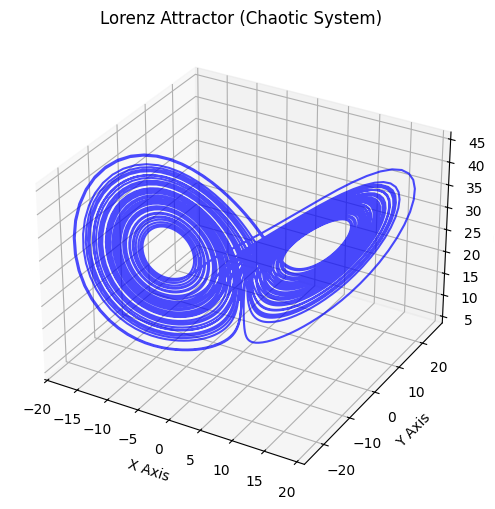

✅ Lorenz attractor visualization saved at 'results/lorenz_attractor.png'.


In [8]:
# Generate and save visualization
plot_lorenz_attractor(data)


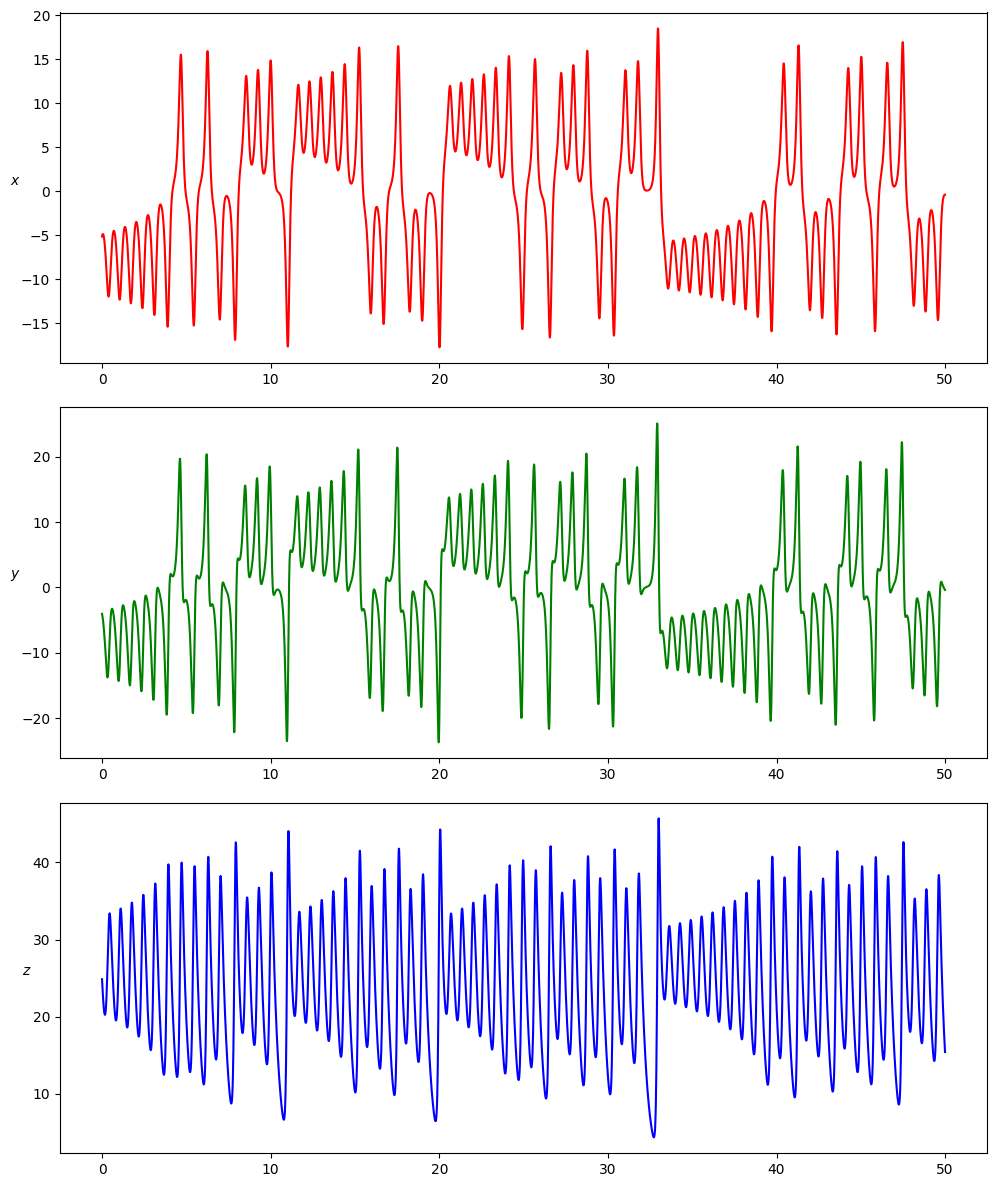

In [9]:
x,y,z = data.T
fig,axs = plt.subplots(3,1, figsize=(10,12))
fig.tight_layout()
axs[0].plot(t,x, 'r')
axs[0].set_ylabel(r'$x$', rotation=0)

axs[1].plot(t,y, 'g')
axs[1].set_ylabel(r'$y$', rotation=0)

axs[2].plot(t,z, 'b')
axs[2].set_ylabel(r'$z$', rotation=0)

plt.show()